In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json

In [2]:
print("\nMemuat hasil model...")

try:
    # Load summaries
    with open('results/bilstm_summary.pkl', 'rb') as f:
        bilstm = pickle.load(f)

    with open('results/indobertweet_summary.pkl', 'rb') as f:
        bert = pickle.load(f)

    with open('results/hybrid_summary.pkl', 'rb') as f:
        hybrid = pickle.load(f)

    # Load test labels
    y_test = np.load('processed_data/y_test.npy')

    print("Data berhasil dimuat")

except Exception as e:
    print(f"Error: {e}")


Memuat hasil model...
Data berhasil dimuat


In [3]:
print("\nEkstrak metrik utama...")

# Fungsi untuk format parameter
def format_param(p):
    if p >= 1_000_000:
        return f"{p/1_000_000:.1f}M"
    elif p >= 1_000:
        return f"{p/1_000:.0f}K"
    return str(p)

# Ekstrak metrik utama
bilstm_acc = bilstm['performance']['best_val_accuracy'] # Adjusted to correctly access accuracy
bert_acc = bert['test_accuracy']
hybrid_acc = hybrid['test_accuracy']

bilstm_f1 = bilstm['performance']['macro_f1'] # Adjusted to correctly access macro_f1
bert_f1 = bert['macro_f1']
hybrid_f1 = hybrid['macro_f1']

bilstm_param = bilstm['parameters']
bert_param = bert['parameters']
hybrid_param = hybrid['parameters']


Ekstrak metrik utama...


In [4]:
print("\n" + "="*60)
print("HASIL UTAMA")
print("="*60)

print(f"\n{'Model':<15} {'Akurasi':<10} {'F1-Score':<10} {'Parameter':<12}")
print("-" * 50)
print(f"{'Bi-LSTM':<15} {bilstm_acc:<10.4f} {bilstm_f1:<10.4f} {format_param(bilstm_param['total']):<12}")
print(f"{'IndoBERTweet':<15} {bert_acc:<10.4f} {bert_f1:<10.4f} {format_param(bert_param):<12}")
print(f"{'Hybrid':<15} {hybrid_acc:<10.4f} {hybrid_f1:<10.4f} {format_param(hybrid_param):<12}")
print("-" * 50)

# Model terbaik
accuracies = [bilstm_acc, bert_acc, hybrid_acc]
model_names = ['Bi-LSTM', 'IndoBERTweet', 'Hybrid']
best_acc_idx = np.argmax(accuracies)
best_f1_idx = np.argmax([bilstm_f1, bert_f1, hybrid_f1])

print(f"\nAkurasi Terbaik: {model_names[best_acc_idx]} ({accuracies[best_acc_idx]:.4f})")
print(f"F1-Score Terbaik: {model_names[best_f1_idx]} ({[bilstm_f1, bert_f1, hybrid_f1][best_f1_idx]:.4f})")


HASIL UTAMA

Model           Akurasi    F1-Score   Parameter   
--------------------------------------------------
Bi-LSTM         0.7663     0.6071     1.4M        
IndoBERTweet    0.9204     0.8677     110.6M      
Hybrid          0.9090     0.8425     111.9M      
--------------------------------------------------

Akurasi Terbaik: IndoBERTweet (0.9204)
F1-Score Terbaik: IndoBERTweet (0.8677)



VISUALISASI HASIL
Visualisasi disimpan: results/perbandingan_model.png


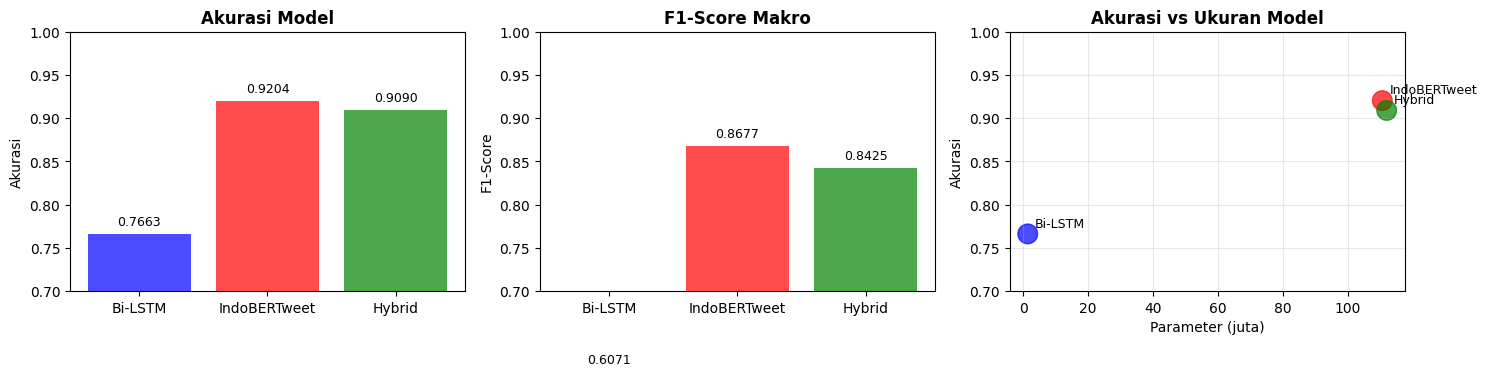

In [5]:
print("\n" + "="*60)
print("VISUALISASI HASIL")
print("="*60)

# Buat visualisasi sederhana
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 1. Bar chart akurasi
axes[0].bar(model_names, accuracies, color=['blue', 'red', 'green'], alpha=0.7)
axes[0].set_title('Akurasi Model', fontweight='bold')
axes[0].set_ylabel('Akurasi')
axes[0].set_ylim([0.7, 1.0])
for i, v in enumerate(accuracies):
    axes[0].text(i, v + 0.01, f'{v:.4f}', ha='center', fontsize=9)

# 2. Bar chart F1-Score
f1_scores = [bilstm_f1, bert_f1, hybrid_f1]
axes[1].bar(model_names, f1_scores, color=['blue', 'red', 'green'], alpha=0.7)
axes[1].set_title('F1-Score Makro', fontweight='bold')
axes[1].set_ylabel('F1-Score')
axes[1].set_ylim([0.7, 1.0])
for i, v in enumerate(f1_scores):
    axes[1].text(i, v + 0.01, f'{v:.4f}', ha='center', fontsize=9)

# 3. Scatter plot akurasi vs parameter
params = [bilstm_param['total']/1e6, bert_param/1e6, hybrid_param/1e6]  # Dalam juta
scatter = axes[2].scatter(params, accuracies, s=200,
                         c=['blue', 'red', 'green'], alpha=0.7)
axes[2].set_title('Akurasi vs Ukuran Model', fontweight='bold')
axes[2].set_xlabel('Parameter (juta)')
axes[2].set_ylabel('Akurasi')
axes[2].set_ylim([0.7, 1.0])
axes[2].grid(True, alpha=0.3)

# Anotasi titik
for i, (x, y, name) in enumerate(zip(params, accuracies, model_names)):
    axes[2].annotate(name, (x, y), xytext=(5, 5),
                     textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.savefig('results/perbandingan_model.png', dpi=150, bbox_inches='tight')
print("Visualisasi disimpan: results/perbandingan_model.png")
plt.show()

In [7]:
print("\n" + "="*60)
print("REKOMENDASI PRAKTIS")
print("="*60)

# Logika rekomendasi sederhana
if bert_acc > 0.85:
    rec = "IndoBERTweet"
    reason = "Akurasi tertinggi untuk teks Bahasa Indonesia"
elif bilstm_acc > 0.8 and bilstm_param['total'] < 5_000_000: # Access 'total' key
    rec = "Bi-LSTM"
    reason = "Cukup akurat dan sangat efisien"
else:
    rec = "Hybrid"
    reason = "Keseimbangan terbaik"

print(f"\nREKOMENDASI UTAMA: {rec}")
print(f"   Alasan: {reason}")

print("\nPILIH BERDASARKAN KEBUTUHAN:")
print("1. Akurasi tinggi + Bahasa Indonesia → IndoBERTweet")
print("2. Efisiensi maksimal + cepat → Bi-LSTM")
print("3. Keseimbangan semua aspek → Hybrid")

print("\nPERTIMBANGAN:")
print(f"• Bi-LSTM: {format_param(bilstm_param['total'])} param, sangat ringan") # Access 'total' key
print(f"• IndoBERTweet: {format_param(bert_param)} param, paling akurat")
print(f"• Hybrid: {format_param(hybrid_param)} param, seimbang")


REKOMENDASI PRAKTIS

REKOMENDASI UTAMA: IndoBERTweet
   Alasan: Akurasi tertinggi untuk teks Bahasa Indonesia

PILIH BERDASARKAN KEBUTUHAN:
1. Akurasi tinggi + Bahasa Indonesia → IndoBERTweet
2. Efisiensi maksimal + cepat → Bi-LSTM
3. Keseimbangan semua aspek → Hybrid

PERTIMBANGAN:
• Bi-LSTM: 1.4M param, sangat ringan
• IndoBERTweet: 110.6M param, paling akurat
• Hybrid: 111.9M param, seimbang


In [9]:
print("\n" + "="*60)
print("SIMPAN HASIL")
print("="*60)

# Data untuk disimpan
hasil_ringkas = {
    'tanggal': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M'),
    'model_terbaik_akurasi': {
        'nama': model_names[best_acc_idx],
        'akurasi': float(accuracies[best_acc_idx])
    },
    'model_terbaik_f1': {
        'nama': model_names[best_f1_idx],
        'f1_score': float([bilstm_f1, bert_f1, hybrid_f1][best_f1_idx])
    },
    'rekomendasi': {
        'model': rec,
        'alasan': reason
    },
    'detail_performa': {
        'bilstm': {
            'akurasi': float(bilstm_acc),
            'f1_score': float(bilstm_f1),
            'parameter': int(bilstm_param['total']),
            'parameter_format': format_param(bilstm_param['total'])
        },
        'indobertweet': {
            'akurasi': float(bert_acc),
            'f1_score': float(bert_f1),
            'parameter': int(bert_param),
            'parameter_format': format_param(bert_param)
        },
        'hybrid': {
            'akurasi': float(hybrid_acc),
            'f1_score': float(hybrid_f1),
            'parameter': int(hybrid_param),
            'parameter_format': format_param(hybrid_param)
        }
    }
}

# Simpan sebagai JSON
with open('results/hasil_perbandingan.json', 'w', encoding='utf-8') as f:
    json.dump(hasil_ringkas, f, indent=2, ensure_ascii=False)

print("Hasil disimpan: results/hasil_perbandingan.json")


SIMPAN HASIL
Hasil disimpan: results/hasil_perbandingan.json


In [11]:
# Buat ringkasan teks
ringkasan = f"""
RINGKASAN PERBANDINGAN MODEL
{'='*60}

HASIL TEST:
• Bi-LSTM:      {bilstm_acc:.4f} akurasi, {bilstm_f1:.4f} F1, {format_param(bilstm_param['total'])} param
• IndoBERTweet: {bert_acc:.4f} akurasi, {bert_f1:.4f} F1, {format_param(bert_param)} param
• Hybrid:       {hybrid_acc:.4f} akurasi, {hybrid_f1:.4f} F1, {format_param(hybrid_param)} param

TERBAIK:
• Akurasi: {model_names[best_acc_idx]} ({accuracies[best_acc_idx]:.4f})
• F1-Score: {model_names[best_f1_idx]} ({[bilstm_f1, bert_f1, hybrid_f1][best_f1_idx]:.4f})

REKOMENDASI: {rec}
   {reason}

"""

# Simpan ringkasan
with open('results/ringkasan_akhir.txt', 'w', encoding='utf-8') as f:
    f.write(ringkasan)

print("Ringkasan disimpan: results/ringkasan_akhir.txt")

Ringkasan disimpan: results/ringkasan_akhir.txt
